<a href="https://colab.research.google.com/github/Haranth/Machine-learning/blob/main/Customer_Segmaentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For statistical data visualization
from sklearn.cluster import KMeans  # For K-means clustering
from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.decomposition import PCA  # For dimensionality reduction (visualization)


In [2]:
# Load a sample customer dataset
data = pd.DataFrame({
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 70, 100),
    'Annual Income (k$)': np.random.randint(15, 135, 100),
    'Spending Score (1-100)': np.random.randint(1, 100, 100)
})

print(data.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   54                  31                      56
1           2   63                 130                      61
2           3   29                  94                      58
3           4   38                  85                       5
4           5   34                  90                      26


In [3]:
# Selecting features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features[:5])  # Display the first 5 rows of scaled data


[[ 0.81509439 -1.24013608  0.1200971 ]
 [ 1.41053672  1.63849164  0.30716423]
 [-0.83891208  0.59171792  0.19492395]
 [-0.24346975  0.33002449 -1.78798765]
 [-0.50811079  0.47540973 -1.00230569]]


In [4]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # We choose 4 clusters arbitrarily
kmeans.fit(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

print(data.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   54                  31                      56        0
1           2   63                 130                      61        3
2           3   29                  94                      58        1
3           4   38                  85                       5        0
4           5   34                  90                      26        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


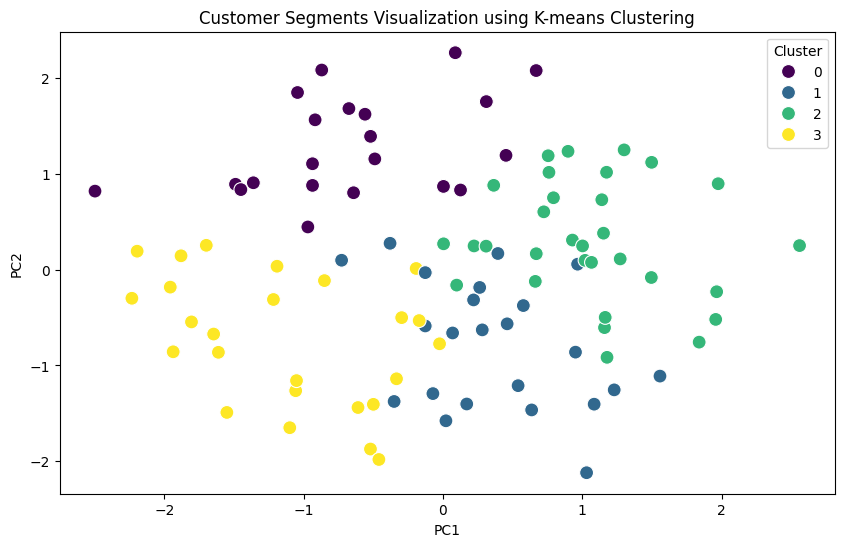

In [5]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Customer Segments Visualization using K-means Clustering')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

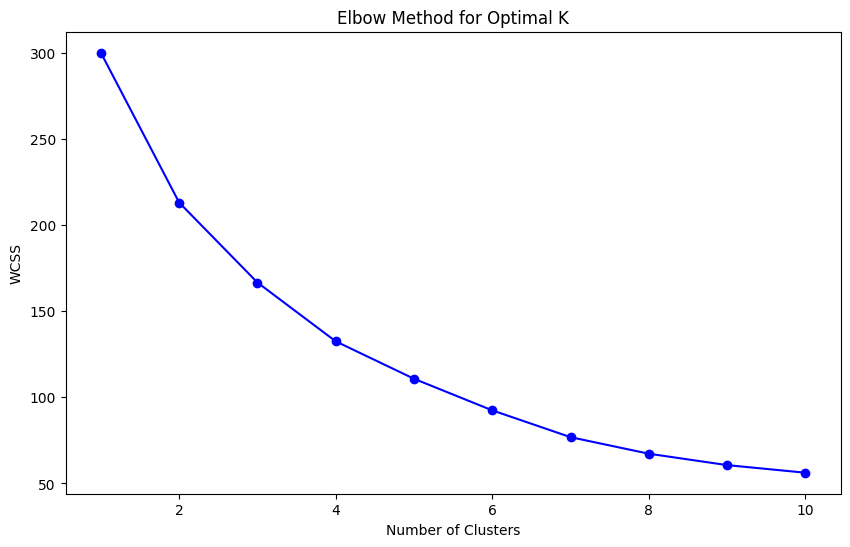

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
